In [17]:
%pip install pandas matplotlib mnist scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math
from math import e

In [19]:
data = datasets.load_digits()
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [20]:
X_0 = data['data']
Y_0 = data['target']


In [21]:
n = 1797
d = 64

In [22]:
# def draw_sample(X,Y):
#     fig,ax = plt.subplots(4,5,figsize = (12,9))
    
#     for i in range(20):
#         plt.subplot(4,5,i+1)
#         plt.imshow(X[i].reshape((8,8)))
#         plt.title(f"Y = {Y[i]}")
# draw_sample(X,Y)        


In [23]:
X_0.shape

(1797, 64)

In [24]:
Y = []
X = []

In [25]:
# get sample 0 and 1
for i in range(len(Y_0)):
    if(Y_0[i] == 0 or Y_0[i] == 1):
       X.append(X_0[i])
       Y.append(Y_0[i])

In [26]:
X = np.array(X)
Y = np.array(Y)
X_train = X[::int(0.8*len(X))]
Y_train = Y[:: int(0.8*len(Y))]
X_test = X[len(X) - int(0.2*len(X))::]
Y_test = Y[len(Y) - int(0.2*len(Y))::]

In [27]:
#w, w0, ld, break(x)
w = np.zeros([1,X.shape[1]])
w0 = 0
ld = 0.005

In [28]:
#f(x)
def fx(w, w0, x):
    
    return x.dot(w.transpose()) + w0

In [29]:
#sigmoid
def sig_moid(z):
    return 1/(1 + e**(-z))

In [30]:
#loga_w (w is vector)
def loga_w(w,w0, Y,X):
    res = 0
    for i in range(len(X)):
        z = fx(w,w0,X[i])
        mu = 1/(1 + e**(-z))
        res += (mu - Y[i])*X[i]
    return res        

#loga_w0(w0 is number)
def loga_w0(w,w0,Y,X):
    res = 0
    for i in range(len(X)):
        z = z = fx(w,w0,X[i])
        mu = 1/(1 + e**(-z))
        res += (mu - Y[i])
    return res                  

In [31]:
def standard(w):
    row = w.shape[0]
    col = w.shape[1]
    w = np.reshape(w,[1,row*col])
    square = 0
    for i in range(w.shape[1]):
        square += w[0][i]**2
    return math.sqrt(square)    

In [32]:
#epoch(training)
w = w -ld*loga_w(w,w0,Y_train,X_train)
w0 = w0 - ld*loga_w0(w,w0,Y_train,X_train)
while( abs(standard(w) - standard(w - ld*loga_w(w,w0,Y_train,X_train).reshape(1,64))) > 10**(-6) or abs(w0 - (w0 - ld*loga_w0(w,w0,Y_train,X_train))) > 10**(-6)):
    w = w - ld*loga_w(w,w0,Y_train,X_train)
    w0 = w0 - ld*loga_w0(w,w0,Y_train,X_train)
    print(abs(standard(w) - standard(w - ld*loga_w(w,w0,Y_train,X_train).reshape(1,64))))
    print(abs(w0 - (w0 - ld*loga_w0(w,w0,Y_train,X_train))))

0.004229238102228
[9.60905149e-05]
0.0035519603155972357
[5.64557846e-05]
0.00315738430382842
[3.7792546e-05]
0.0028711211965916084
[2.74270981e-05]
0.0026429166809120996
[2.11306649e-05]
0.0024524618762047645
[1.70540362e-05]
0.0022894169848876877
[1.42756195e-05]
0.0021475635209832478
[1.22977145e-05]
0.002022716770303745
[1.08355139e-05]
0.0019118498284908803
[9.71834063e-06]
0.0018126694942392496
[8.83985134e-06]
0.00172338402950023
[8.1314976e-06]
0.0016425627360695805
[7.54773696e-06]
0.0015690444294071682
[7.05747545e-06]
0.0015018744162192121
[6.63895074e-06]
0.0014402593330556657
[6.27658201e-06]
0.0013835338169947142
[5.95897904e-06]
0.001331135351533702
[5.67765357e-06]
0.0012825849445660398
[5.42616676e-06]
0.0012374720710338072
[5.19955362e-06]
0.0011954427958684732
[4.99392726e-06]
0.0011561903068361135
[4.80620185e-06]
0.0011194472982191395
[4.63389564e-06]
0.0010849797924841198
[4.47498872e-06]
0.0010525820905651073
[4.32781885e-06]
0.0010220726160111715
[4.19100414e-06

In [33]:
w

array([[ 0.        ,  0.        , -0.04420727, -0.11493891, -0.00157054,
         0.09752566,  0.00709114,  0.        ,  0.        ,  0.        ,
        -0.11493891, -0.09007497,  0.02504371, -0.01916356, -0.03002499,
         0.        ,  0.        , -0.00525094, -0.04043699,  0.09577534,
         0.11345825,  0.01620226, -0.07073164,  0.        ,  0.        ,
         0.02845445,  0.0073608 ,  0.08509369,  0.11345825,  0.02854434,
        -0.07073164,  0.        ,  0.        , -0.03711613, -0.04945821,
         0.        ,  0.11345825,  0.01261174, -0.07073164,  0.        ,
         0.        , -0.03536582, -0.097256  ,  0.        ,  0.09043452,
        -0.01391262, -0.06189018,  0.        ,  0.        , -0.01768291,
        -0.12378036, -0.04420727, -0.00332085,  0.0073608 ,  0.0354557 ,
         0.        ,  0.        ,  0.        , -0.05304873, -0.11493891,
        -0.03168542,  0.11345825,  0.04963799,  0.        ]])

In [34]:
w0

array([-0.0017505])

In [35]:
X.shape

(360, 64)

err
err


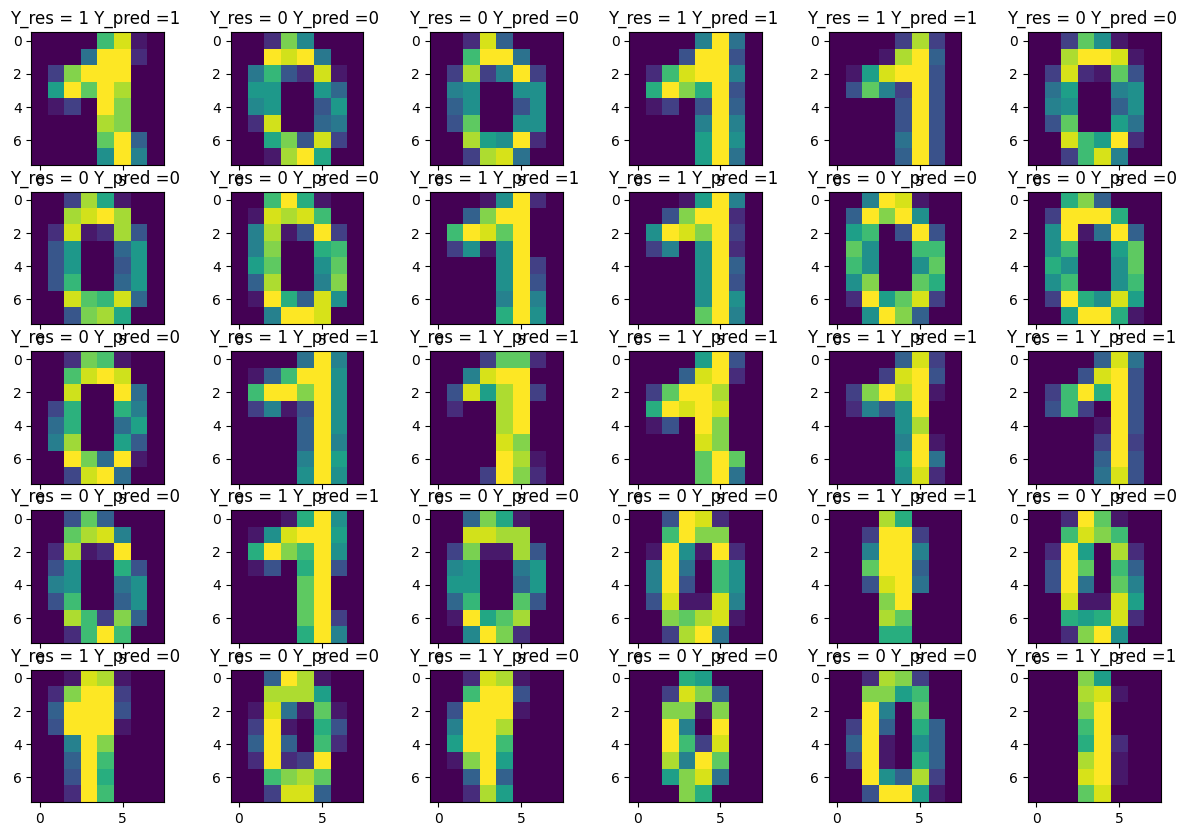

In [37]:
#test
def draw_test(X_test,Y_test):
    fig,ax = plt.subplots(5,6,figsize = (15,10))
    for i in range(30):
        plt.subplot(5,6,i+1)
        plt.imshow(X_test[i].reshape((8,8)))
        prob = sig_moid(fx(w,w0,X_test[i]))
        pred = 3
        if(prob > 0.5):
            pred = 1
        if(prob < 0.5):
            pred = 0  
        if Y_test[i] != pred:
            print("err")  
        plt.title(f"Y_res = {Y_test[i]} Y_pred ={pred} ")
draw_test(X_test,Y_test)     